In [ ]:
!pip install librosa

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import os
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.io import wavfile
import plotly.express as px
import plotly.figure_factory as ff
from google.colab import drive
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Dropout, Flatten, Conv1D, Input, MaxPooling1D, MaxPooling2D, LSTM
from keras.models import Model,  Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import np_utils
from keras import backend as K
from keras.models import load_model,save_model
import random
from tensorflow.keras import layers
from tensorflow.keras.layers import TimeDistributed, LayerNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
import kapre
from kapre.composed import get_melspectrogram_layer, get_log_frequency_spectrogram_layer

In [ ]:
drive.mount('/content/drive')
data_dir = '/content/drive/MyDrive/STT_Database'
print(os.listdir(data_dir))
traindr=os.path.join(data_dir,os.listdir(data_dir)[0])
print(traindr)

Mounted at /content/drive

['audio']

/content/drive/MyDrive/STT_Database/audio


In [ ]:
train_audio_path = traindr
allaudios=os.listdir(train_audio_path)
print(allaudios)
rpath=traindr
os.path.join(rpath,os.listdir(rpath)[0])

['bed', 'eight', 'cat', 'four', 'bird', 'down', 'five', 'dog', 'happy', 'go', 'nine', 'one', 'on', 'house', 'left', 'marvin', 'no', 'off', 'right', 'seven', 'wow', 'two', 'sheila', 'up', 'three', 'yes', 'stop', 'six', 'tree', 'zero', '_background_noise_']


'/content/drive/MyDrive/STT_Database/audio/bed'

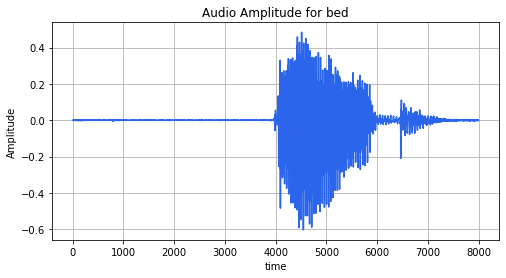

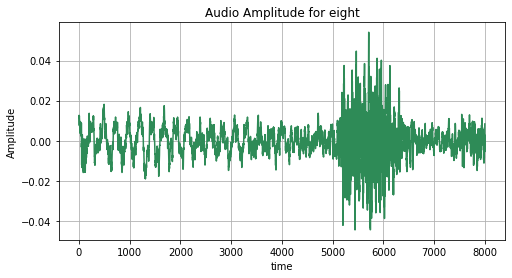

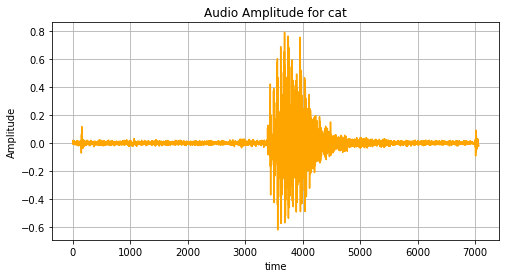

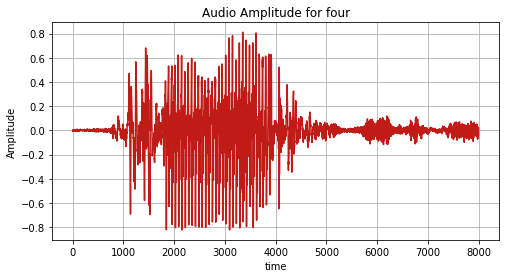

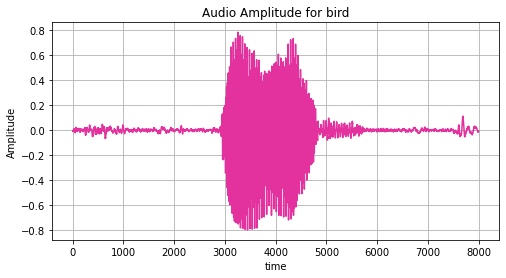

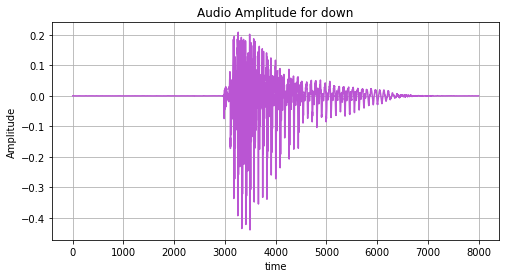

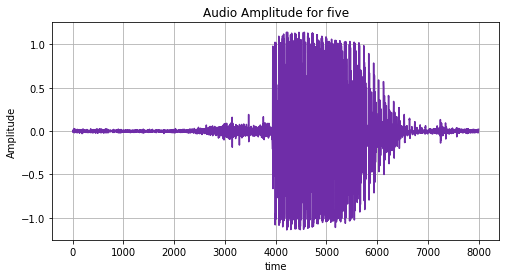

In [ ]:
colseq=["#2B65EC","#2E8B57","#FFA500","#C11B17","#E3319D","#BA55D3","#6F2DA8"]
for i in range(len(allaudios[3:10])):
  presdir=os.path.join(rpath,os.listdir(rpath)[i])
  samples, sample_rate = librosa.load(os.path.join(presdir,os.listdir(presdir)[0]), sr = 8000)
  plt.figure(figsize=(8, 4))
  plt.title('Audio Amplitude for '+os.listdir(rpath)[i])
  plt.xlabel('time')
  plt.ylabel('Amplitude')
  plt.grid()
  plt.plot(samples,color=colseq[i])

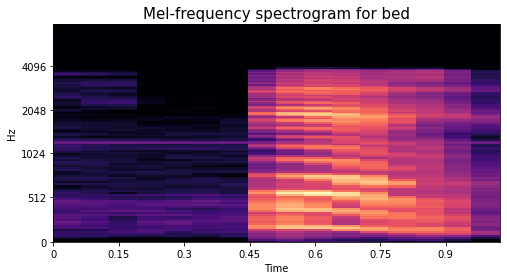

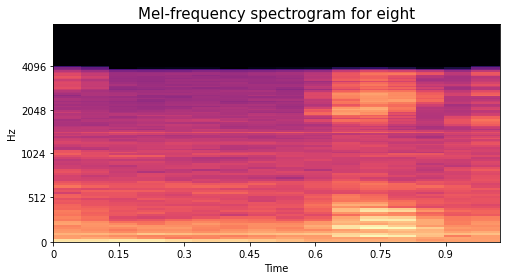

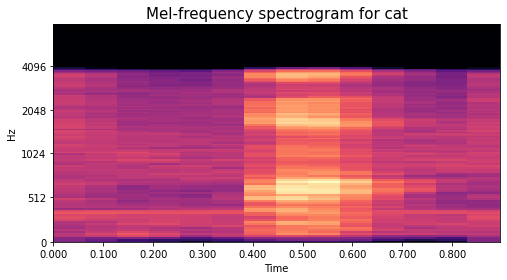

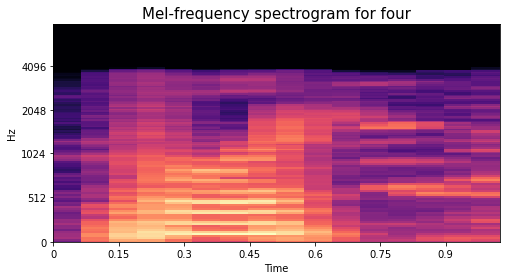

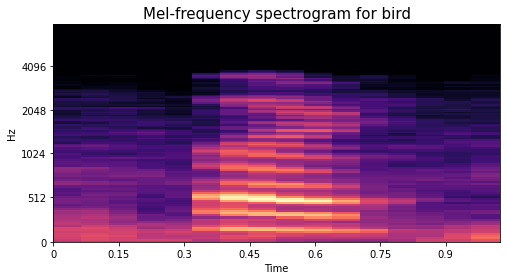

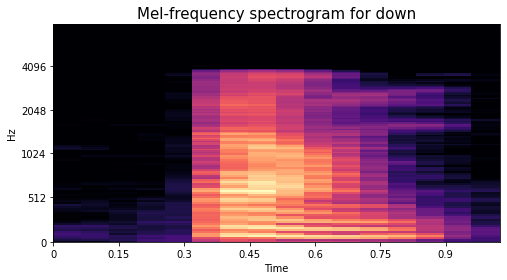

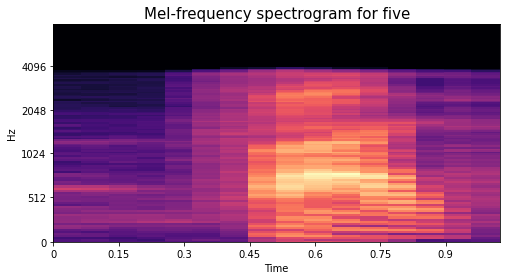

In [ ]:
for i in range(len(allaudios[3:10])):
  presdir=os.path.join(rpath,os.listdir(rpath)[i])
  samples, sample_rate = librosa.load(os.path.join(presdir,os.listdir(presdir)[0]), sr = 8000)
  S = librosa.feature.melspectrogram(y=samples, sr=sample_rate, n_mels=128,fmax=8000)
  plt.figure(figsize=(8,4))
  S_dB = librosa.power_to_db(S, ref=np.max)
  img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sample_rate,fmax=8000)
  plt.title('Mel-frequency spectrogram for '+os.listdir(rpath)[i],fontsize=15)

In [ ]:
labels=os.listdir(train_audio_path)
no_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    no_of_recordings.append(len(waves))
print(labels)
recdf=pd.DataFrame({"Audio":labels,"Recording":no_of_recordings})
fig=px.bar(recdf,x="Audio",y="Recording",text="Recording", color="Audio",title="Count of Recording in Audio Types")
fig.show()
recdf.to_csv("recdetails.csv")

['bed', 'eight', 'cat', 'four', 'bird', 'down', 'five', 'dog', 'happy', 'go', 'nine', 'one', 'on', 'house', 'left', 'marvin', 'no', 'off', 'right', 'seven', 'wow', 'two', 'sheila', 'up', 'three', 'yes', 'stop', 'six', 'tree', 'zero', '_background_noise_']


In [ ]:
all_wave = []
all_label = []
for label in labels:
    print(label)
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        samples, sample_rate = librosa.load(train_audio_path + '/' + label + '/' + wav, sr = 16000)
        samples = librosa.resample(samples, sample_rate, 8000)
        if(len(samples)== 8000) : 
            all_wave.append(samples)
            all_label.append(label)

bed

eight

cat

four

bird

down

five

dog

happy

go

nine

one

on

house

left

marvin

no

off

right

seven

wow

two

sheila

up

three

yes

stop

six

tree

zero

_background_noise_


In [ ]:
le = LabelEncoder()
y=le.fit_transform(all_label)
classes= list(le.classes_)
y=np_utils.to_categorical(y, num_classes=len(labels))
all_wave = np.array(all_wave).reshape(-1,8000,1)
x_tr, x_val, y_tr, y_val = train_test_split(np.array(all_wave),np.array(y),stratify=y,test_size = 0.2,random_state=388,shuffle=True)

### Fully Connected CNN Model






In [ ]:
pd="valid"
act="relu"
filter=10
kr=16

spchcnn = Conv1D(filter,kr, padding=pd, activation=act)(inputs)
spchcnn = MaxPooling1D(3)(spchcnn)
spchcnn = Dropout(0.3)(spchcnn)
spchcnn = Conv1D(filter*2, kr-3, padding=pd, activation=act)(spchcnn)
spchcnn = MaxPooling1D(3)(spchcnn)
spchcnn = Dropout(0.3)(spchcnn)
spchcnn = Conv1D(filter*4, kr-6, padding=pd, activation=act)(spchcnn)
spchcnn = MaxPooling1D(3)(spchcnn)
spchcnn = Dropout(0.3)(spchcnn)
spchcnn = Conv1D(filter*8, kr-9, padding=pd, activation=act)(spchcnn)
spchcnn = MaxPooling1D(3)(spchcnn)
spchcnn = Dropout(0.3)(spchcnn)
spchcnn = Flatten()(spchcnn)
spchcnn = Dense(256, activation=act)(spchcnn)
spchcnn = Dropout(0.3)(spchcnn)
spchcnn = Dense(128, activation=act)(spchcnn)
spchcnn = Dropout(0.3)(spchcnn)

outputs = Dense(len(labels), activation='softmax')(spchcnn)

cnn_model = Model(inputs, outputs, name="Speech_to_Text_CNN")
cnn_model.summary()

Model: "Speech_to_Text_CNN"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 input_1 (InputLayer)        [(None, 8000, 1)]         0         

                                                                 

 conv1d (Conv1D)             (None, 7985, 10)          170       

                                                                 

 max_pooling1d (MaxPooling1D  (None, 2661, 10)         0         

 )                                                               

                                                                 

 dropout (Dropout)           (None, 2661, 10)          0         

                                                                 

 conv1d_1 (Conv1D)           (None, 2649, 20)          2620      

                                                                 

 max_pooling1d_1 (MaxPooling  (None, 883, 20)          0         

 1D)                            

In [ ]:
cnn_model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),metrics=['accuracy'])
cnn_history=cnn_model.fit(x_tr, y_tr ,epochs=100,  batch_size=64, validation_data=(x_val,y_val))

Epoch 1/100

544/544 [==============================] - 22s 19ms/step - loss: 3.0940 - accuracy: 0.0928 - val_loss: 2.8097 - val_accuracy: 0.1595

Epoch 2/100

544/544 [==============================] - 10s 18ms/step - loss: 2.3975 - accuracy: 0.2483 - val_loss: 2.0783 - val_accuracy: 0.3672

Epoch 3/100

544/544 [==============================] - 9s 17ms/step - loss: 1.8821 - accuracy: 0.4041 - val_loss: 1.5493 - val_accuracy: 0.5443

Epoch 4/100

544/544 [==============================] - 9s 17ms/step - loss: 1.5560 - accuracy: 0.5157 - val_loss: 1.3381 - val_accuracy: 0.6155

Epoch 5/100

544/544 [==============================] - 10s 19ms/step - loss: 1.3457 - accuracy: 0.5805 - val_loss: 1.2302 - val_accuracy: 0.6515

Epoch 6/100

544/544 [==============================] - 9s 17ms/step - loss: 1.2024 - accuracy: 0.6301 - val_loss: 0.9449 - val_accuracy: 0.7193

Epoch 7/100

544/544 [==============================] - 10s 18ms/step - loss: 1.1081 - accuracy: 0.6567 - val_loss: 0.904

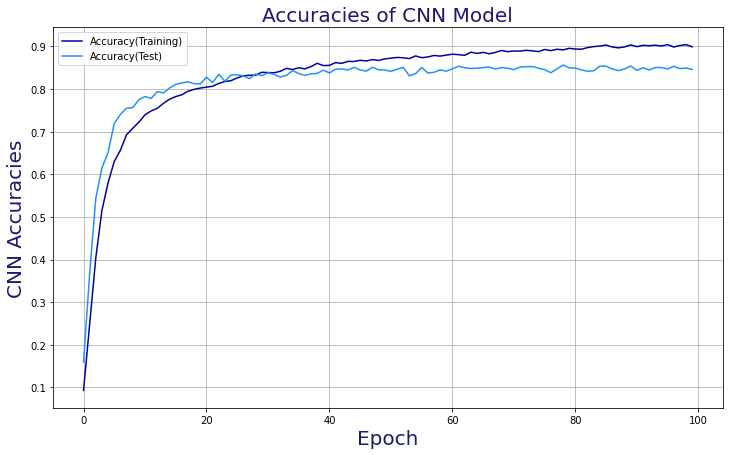

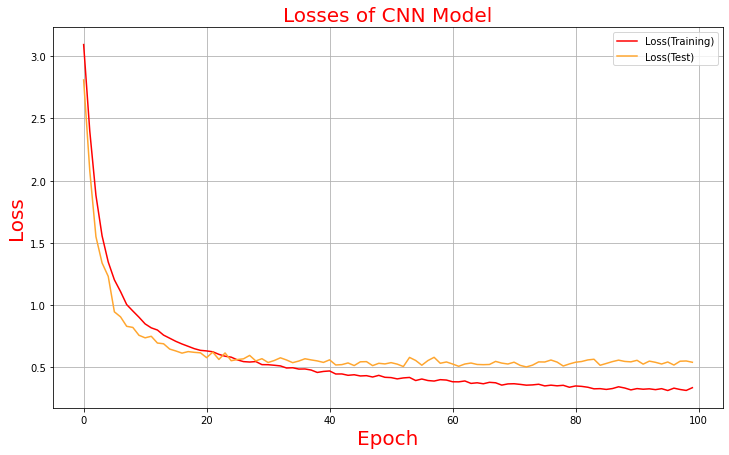

In [ ]:
cnn_results=cnn_history
res_training_acc = cnn_results.history['accuracy']
res_testing_acc = cnn_results.history['val_accuracy']
res_training_loss = cnn_results.history['loss']
res_testing_loss = cnn_results.history['val_loss']
cnn_res_dict=pd.DataFrame({
    "Iteration":[i+1 for i in range(100)],
    "Loss(Training)":res_training_loss,
    "Loss(Test)":res_testing_loss,
    "Accuracy(Training)":res_training_acc,
    "Accuracy(Test)":res_testing_acc
})
cnn_res_dict.to_csv("cnn_res_dict.csv")
cnn_res_dict.iloc[:,3:].plot(kind="line",figsize=(12,7),color=["#0000A0","#1E90FF"])
plt.title("Accuracies of CNN Model",fontsize=20,color="#191970")
plt.xlabel("Epoch",fontsize=20,color="#191970")
plt.ylabel("CNN Accuracies",fontsize=20,color="#191970")
plt.grid()
plt.show()
cnn_res_dict.iloc[:,1:3].plot(kind="line",figsize=(12,7),color=["#FF0000","#FFA62F"])
plt.title("Losses of CNN Model",fontsize=20,color="#FF0000")
plt.xlabel("Epoch",fontsize=20,color="#FF0000")
plt.ylabel("Loss",fontsize=20,color="#FF0000")
plt.grid()
plt.show()

In [ ]:
cnn_model.save('cnn_model_STT.h5')
cnn_best=load_model('cnn_model_STT.h5')

In [ ]:
def cnnpredict(audio):
    prob=cnn_best.predict(audio.reshape(1,8000,1))
    index=np.argmax(prob[0])
    return classes[index]
actual_cnn=[]
cnn_predict=[]
indices_cnn=[]
#print("++++++++++++++++++++++++++++++++++++++")
for i in range(100):
  #print("______________________________________")
  #print("Observation: {}".format(i+1))
  #print("______________________________________")
  index=random.randint(0,len(x_val)-1)
  indices_cnn.append(index)
  samples=x_val[index].ravel()
  #print("\nActual Audio:",classes[np.argmax(y_val[index])])
  actual_cnn.append(classes[np.argmax(y_val[index])])
  ipd.Audio(samples, rate=8000)
  #print("Converted Text:",predict(samples),"\n")
  cnn_predict.append(cnnpredict(samples))
#print("++++++++++++++++++++++++++++++++++++++")

In [ ]:
cnndf=pd.DataFrame({"Indices":indices_cnn,"CNN(Actual)":actual_cnn,"CNN(Predict)":cnn_predict})
cnndf.to_csv("STTCNN.csv")
cnndf

,Indices,CNN(Actual),CNN(Predict)
0,6998,four,four
1,8243,five,five
2,5474,go,go
3,2239,yes,yes
4,5053,happy,happy
...,...,...,...
95,1972,yes,yes
96,1381,cat,cat
97,7897,one,left
98,2903,tree,tree


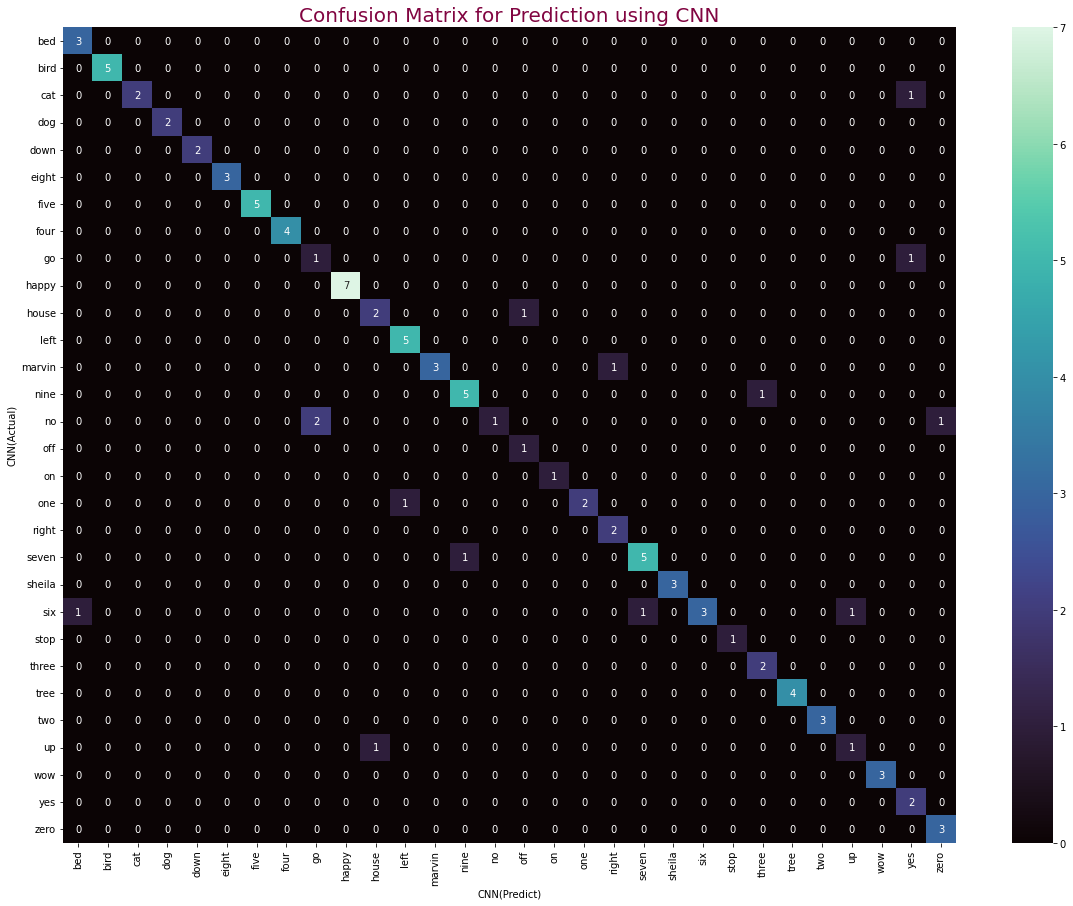

In [ ]:
cnnct=pd.crosstab(cnndf['CNN(Actual)'],cnndf['CNN(Predict)'])
cnnct.to_csv("cnn_crosstab.csv")
plt.figure(figsize=(20,15))
plt.title("Confusion Matrix for Prediction using CNN", fontsize=20,color="#810541")
sns.heatmap(cnnct.iloc[:len(cnndf['CNN(Actual)']),:len(cnndf['CNN(Actual)'])],fmt="d",annot=True,cmap="mako")
plt.show()

In [ ]:
loss,accuracy=cnn_model.evaluate(x_val,y_val)
print("Final Loss for CNN Model Evaluation: {}%\nFinal Accuracy of CNN Model: {}%".format(round(loss,3)*100,round(accuracy,3)*100))

272/272 [==============================] - 2s 5ms/step - loss: 0.5395 - accuracy: 0.8462

Final Loss for CNN Model Evaluation: 53.900000000000006%

Final Accuracy of CNN Model: 84.6%


### Model-2 RNN Model with Melspectrogram Layer

In [ ]:
input_shape = (8000, 1)
act1="relu"

inp = get_melspectrogram_layer(input_shape=input_shape,n_mels=512,pad_end=True,n_fft=1024,win_length=600,
                                 hop_length=160,sample_rate=8000,return_decibel=True,input_data_format='channels_last',
                                 output_data_format='channels_last',name='2d_convolution')  #
spchrnn = LayerNormalization(axis=2)(inp.output)
spchrnn = TimeDistributed(layers.Reshape((-1,)))(spchrnn)
disttime = TimeDistributed(layers.Dense(256, activation='tanh'))(spchrnn)  #
spchrnn = layers.Bidirectional(layers.LSTM(256, return_sequences=True))(disttime)
spchrnn = layers.concatenate([disttime, spchrnn], axis=2)
spchrnn = layers.Dense(64, activation=act1)(spchrnn)
spchrnn = layers.MaxPooling1D()(spchrnn)
spchrnn = layers.Dense(64, activation=act1)(spchrnn)
spchrnn = layers.Flatten(name='flatten')(spchrnn)
spchrnn = layers.Dropout(rate=0.2)(spchrnn)
spchrnn = layers.Dense(32, activation=act1,activity_regularizer=l2(0.001))(spchrnn)
oup = layers.Dense(len(labels), activation='softmax')(lyr)
rnn_model = Model(inputs=inp.input, outputs=oup, name='Speech_to_Text_RNN')
rnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),loss='categorical_crossentropy',metrics=['accuracy'])

rnn_model.summary()

Model: "Speech_to_Text_RNN"

__________________________________________________________________________________________________

 Layer (type)                   Output Shape         Param #     Connected to                     


 stft_input (InputLayer)        [(None, 8000, 1)]    0           []                               

                                                                                                  

 stft (STFT)                    (None, 50, 513, 1)   0           ['stft_input[0][0]']             

                                                                                                  

 magnitude (Magnitude)          (None, 50, 513, 1)   0           ['stft[0][0]']                   

                                                                                                  

 apply_filterbank (ApplyFilterb  (None, 50, 512, 1)  0           ['magnitude[0][0]']              

 ank)                                                                 

In [ ]:
rnn_history = rnn_model.fit(x_tr, y_tr ,epochs=100,  batch_size=128, validation_data=(x_val,y_val))

Epoch 1/100

272/272 [==============================] - 16s 39ms/step - loss: 2.3032 - accuracy: 0.3674 - val_loss: 1.2427 - val_accuracy: 0.6932

Epoch 2/100

272/272 [==============================] - 9s 34ms/step - loss: 0.9164 - accuracy: 0.7920 - val_loss: 0.6906 - val_accuracy: 0.8508

Epoch 3/100

272/272 [==============================] - 9s 34ms/step - loss: 0.5828 - accuracy: 0.8786 - val_loss: 0.5631 - val_accuracy: 0.8772

Epoch 4/100

272/272 [==============================] - 10s 35ms/step - loss: 0.4375 - accuracy: 0.9147 - val_loss: 0.4781 - val_accuracy: 0.8971

Epoch 5/100

272/272 [==============================] - 9s 35ms/step - loss: 0.3362 - accuracy: 0.9394 - val_loss: 0.4554 - val_accuracy: 0.8989

Epoch 6/100

272/272 [==============================] - 9s 33ms/step - loss: 0.2721 - accuracy: 0.9551 - val_loss: 0.4240 - val_accuracy: 0.9054

Epoch 7/100

272/272 [==============================] - 9s 34ms/step - loss: 0.2328 - accuracy: 0.9626 - val_loss: 0.3851 

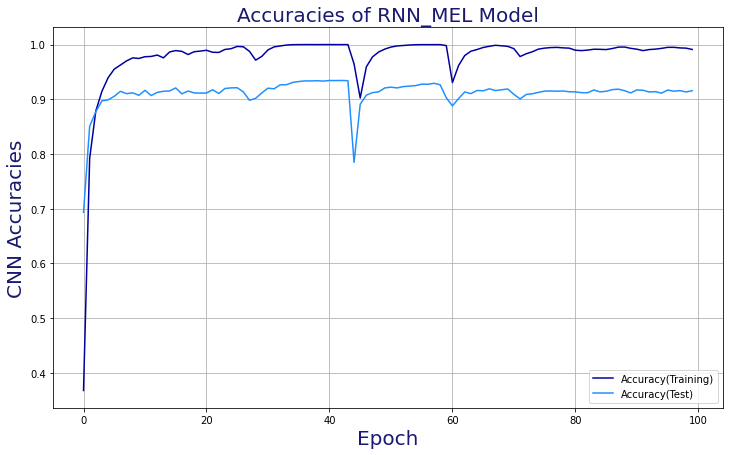

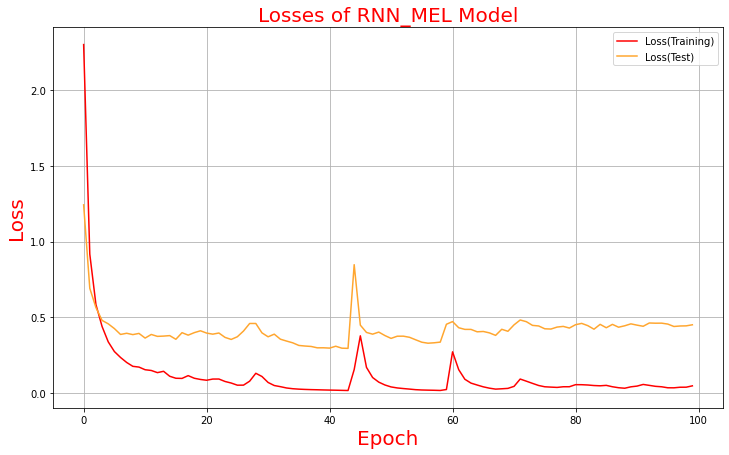

In [ ]:
rnn_mel_results=rnn_history
res_training_acc = rnn_mel_results.history['accuracy']
res_testing_acc = rnn_mel_results.history['val_accuracy']
res_training_loss = rnn_mel_results.history['loss']
res_testing_loss = rnn_mel_results.history['val_loss']
rnn_mel_res_dict=pd.DataFrame({
    "Iteration":[i+1 for i in range(100)],
    "Loss(Training)":res_training_loss,
    "Loss(Test)":res_testing_loss,
    "Accuracy(Training)":res_training_acc,
    "Accuracy(Test)":res_testing_acc
})
rnn_mel_res_dict.to_csv("rnn_mel_res_dict.csv")
rnn_mel_res_dict.iloc[:,3:].plot(kind="line",figsize=(12,7),color=["#0000A0","#1E90FF"])
plt.title("Accuracies of RNN_MEL Model",fontsize=20,color="#191970")
plt.xlabel("Epoch",fontsize=20,color="#191970")
plt.ylabel("CNN Accuracies",fontsize=20,color="#191970")
plt.grid()
plt.show()
rnn_mel_res_dict.iloc[:,1:3].plot(kind="line",figsize=(12,7),color=["#FF0000","#FFA62F"])
plt.title("Losses of RNN_MEL Model",fontsize=20,color="#FF0000")
plt.xlabel("Epoch",fontsize=20,color="#FF0000")
plt.ylabel("Loss",fontsize=20,color="#FF0000")
plt.grid()
plt.show()

In [ ]:
loss1,accuracy1=rnn_model.evaluate(x_val,y_val)
print("Final Loss for RNN Model Evaluation: {}%\nFinal Accuracy of RNN Model: {}%".format(round(loss1,3)*100,round(accuracy1,3)*100))

272/272 [==============================] - 3s 8ms/step - loss: 0.4490 - accuracy: 0.9157

Final Loss for RNN Model Evaluation: 44.9%

Final Accuracy of RNN Model: 91.60000000000001%


In [ ]:
rnn_model.save('rnn_STT_MEL.h5')
rnn_best=load_model('rnn_STT_MEL.h5',custom_objects={'STFT': kapre.time_frequency.STFT,
                                                 'Magnitude':kapre.time_frequency.Magnitude,
                                                 'ApplyFilterbank':kapre.time_frequency.ApplyFilterbank,
                                                 'MagnitudeToDecibel':kapre.time_frequency.MagnitudeToDecibel})

In [ ]:
def rnnpredict(audio):
    prob=rnn_best.predict(audio.reshape(1,8000,1))
    index=np.argmax(prob[0])
    return classes[index]
actual_rnn=[]
rnn_predict=[]
for i in range(len(indices_cnn)):
  index=random.randint(0,len(x_val)-1)
  samples=x_val[indices_cnn[i]].ravel()
  actual_rnn.append(classes[np.argmax(y_val[indices_cnn[i]])])
  ipd.Audio(samples, rate=8000)
  rnn_predict.append(rnnpredict(samples))
rnndf=pd.DataFrame({"Indices":indices_cnn,"RNN_MEL(Actual)":actual_rnn,"RNN_MEL(Predict)":rnn_predict})
rnndf.to_csv("rnn_mel_prediction.csv")
rnndf

,Indices,RNN_MEL(Actual),RNN_MEL(Predict)
0,6998,four,four
1,8243,five,on
2,5474,go,go
3,2239,yes,yes
4,5053,happy,happy
...,...,...,...
95,1972,yes,yes
96,1381,cat,cat
97,7897,one,one
98,2903,tree,tree


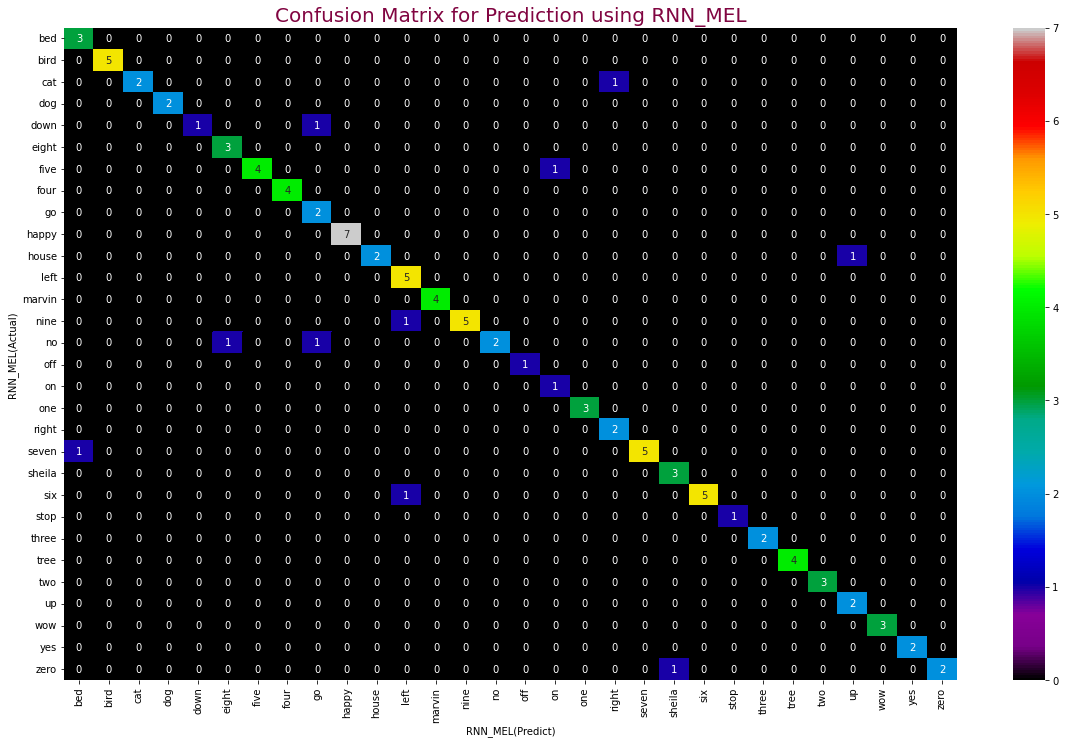

In [ ]:
rnnct=pd.crosstab(rnndf['RNN_MEL(Actual)'],rnndf['RNN_MEL(Predict)'])
rnnct.to_csv("rnn_crosstab.csv")
plt.figure(figsize=(20,12))
plt.title("Confusion Matrix for Prediction using RNN_MEL", fontsize=20,color="#810541")
sns.heatmap(rnnct.iloc[:len(rnndf['RNN_MEL(Actual)']),:len(rnndf['RNN_MEL(Actual)'])],fmt="d",annot=True,cmap="nipy_spectral")
plt.show()

In [ ]:
speechdf=cnndf.copy()
speechdf['RNN_MEL(Predict)']=rnn_predict
speechdf.to_csv("speechdf_final.csv")
speechdf

,Indices,CNN(Actual),CNN(Predict),RNN_MEL(Predict)
0,6998,four,four,four
1,8243,five,five,on
2,5474,go,go,go
3,2239,yes,yes,yes
4,5053,happy,happy,happy
...,...,...,...,...
95,1972,yes,yes,yes
96,1381,cat,cat,cat
97,7897,one,left,one
98,2903,tree,tree,tree


In [ ]:
speech_comp=pd.DataFrame({
    "Model":['CNN','RNN'],
    "Model Accuracy":[round(accuracy,2)*100,round(accuracy1,2)*100],
    "Model Loss":[round(loss,2)*100, round(loss1,2)*100]
})
for i in speech_comp.columns.tolist()[1:]:
    df=speech_comp.sort_values(by=i,ascending=False)
    fig = px.bar(speech_comp, y=i, x="Model",text=i,color="Model",
                 title="Comparison of {}".format(i),height=500,width=700)
    fig.update_layout(
        font=dict(
            family="Times New Roman, Bold",
            size=20,
            color="black"
        )
    )
    fig.show()

## Testing by Taking Speech Files

In [ ]:
def rnnpredicttest(audio):
    prob=rnn_best.predict(audio.reshape(1,8000,1))
    index=np.argmax(prob[0])
    return classes[index]
for i in range(10):
  print("______________________________________")
  print("Observation: {}".format(i+1))
  print("______________________________________")
  index=random.randint(0,len(x_val)-1)
  samples=x_val[index].ravel()
  print("\nActual Audio:",classes[np.argmax(y_val[index])])
  ipd.Audio(samples, rate=8000)
  print("Converted Text:",rnnpredicttest(samples),"\n")
print("++++++++++++++++++++++++++++++++++++++")

______________________________________

Observation: 1

______________________________________



Actual Audio: stop

Converted Text: five 



______________________________________

Observation: 2

______________________________________



Actual Audio: marvin

Converted Text: marvin 



______________________________________

Observation: 3

______________________________________



Actual Audio: bed

Converted Text: bed 



______________________________________

Observation: 4

______________________________________



Actual Audio: eight

Converted Text: eight 



______________________________________

Observation: 5

______________________________________



Actual Audio: tree

Converted Text: tree 



______________________________________

Observation: 6

______________________________________



Actual Audio: up

Converted Text: off 



______________________________________

Observation: 7

______________________________________



Actual Audio: dog

Converted Text: go 



_